In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt 

%matplotlib inline

#### Uncompress Dataset File

In [3]:
if not os.path.exists('./fer2013'):
    import tarfile
    try:
        file = tarfile.open('./fer2013.tar.gz', mode='r:gz')
        try: 
            file.extractall()
        finally: 
            file.close()
    except FileNotFoundError:
        print('File Not Found')
    else:
        file.close()

In [4]:
DATASET = os.path.join('fer2013', 'fer2013.csv')

In [5]:
EMOTION_MAP = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6:'Neutral'}

In [6]:
df = pd.read_csv(DATASET)

In [7]:
df.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [8]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [9]:
img = np.fromstring(df.pixels[0], dtype=np.uint8, sep=' ')

In [10]:
img = img.reshape(48, 48)

In [11]:
from functools import partial

In [12]:
text_annotation = partial(plt.text, x=40, y=46, fontdict={'color': 'red', 'fontsize': 16, 'ha': 'center', 
                                                          'va': 'center', 
                                                          'bbox': dict(boxstyle="round", fc="white", 
                                                                       ec="black", pad=0.2)})

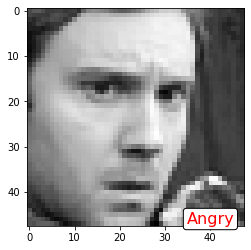

In [13]:
plt.imshow(img, cmap=plt.gray())
text_annotation(s=EMOTION_MAP[df.emotion[0]])
plt.show()

In [14]:
df.shape

(35887, 3)

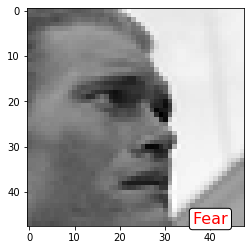

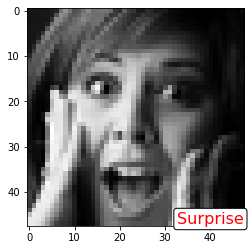

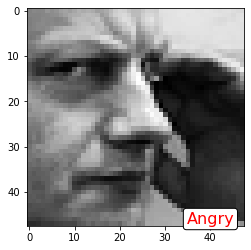

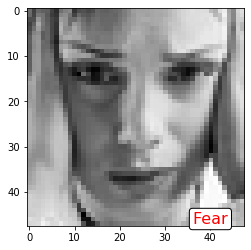

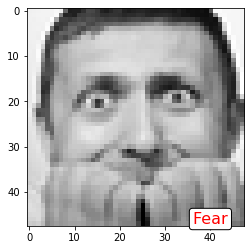

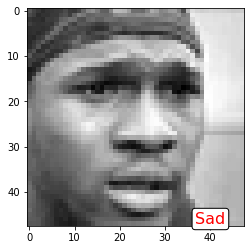

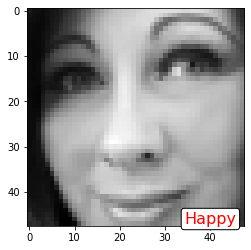

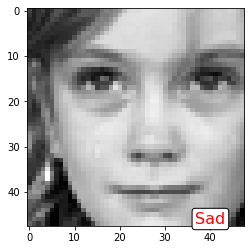

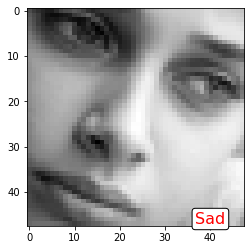

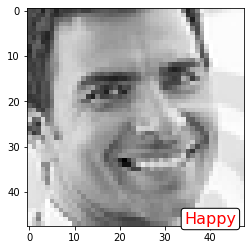

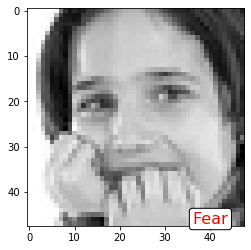

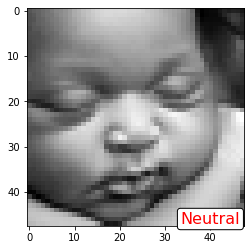

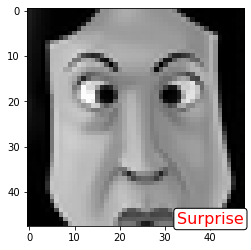

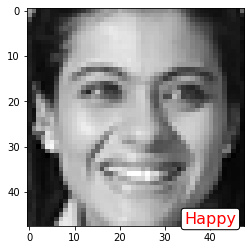

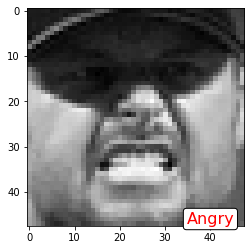

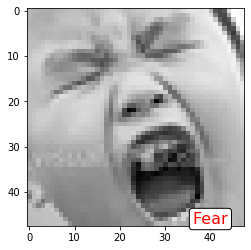

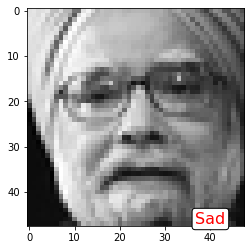

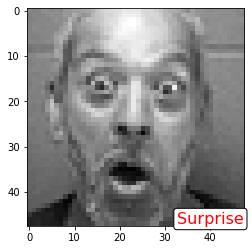

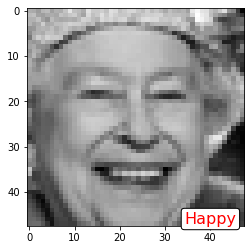

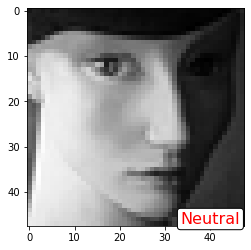

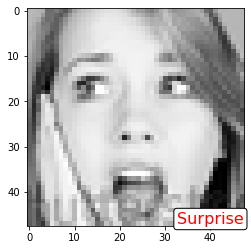

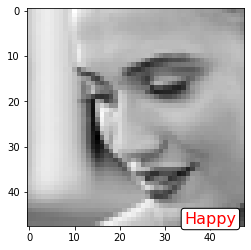

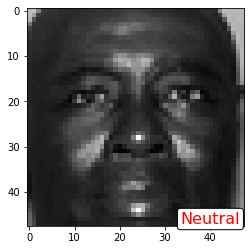

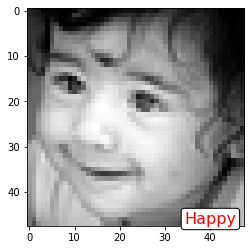

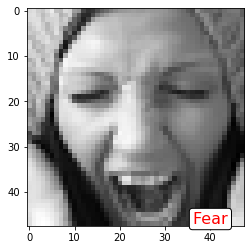

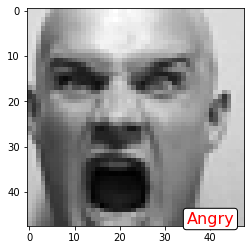

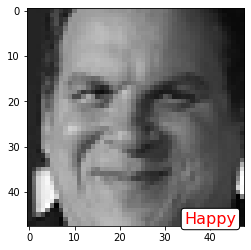

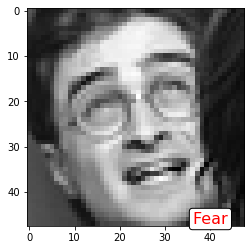

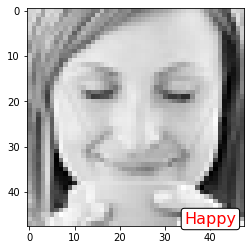

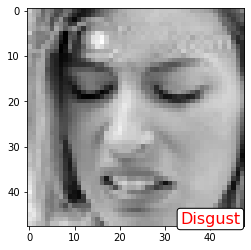

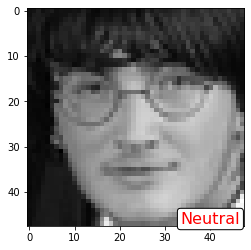

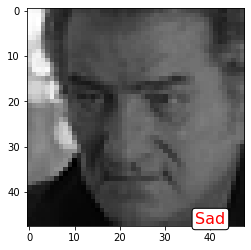

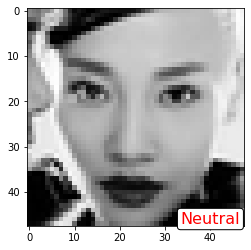

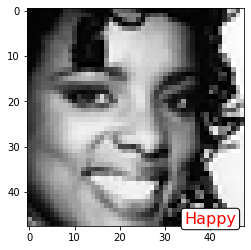

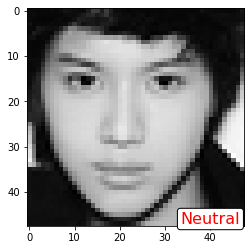

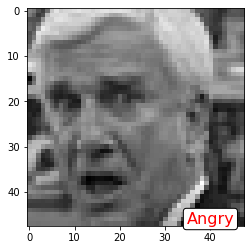

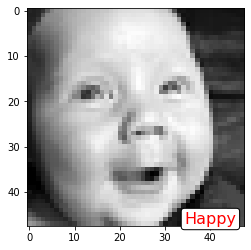

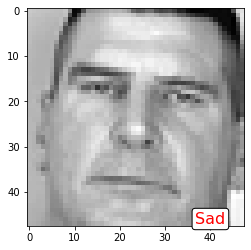

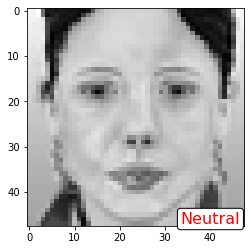

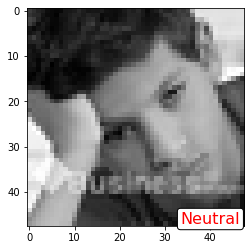

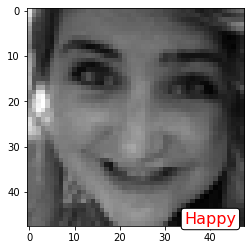

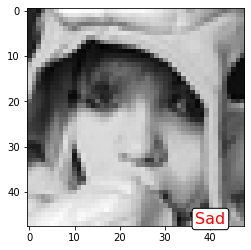

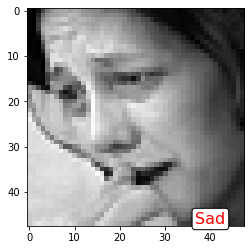

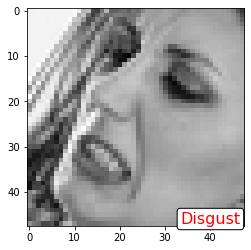

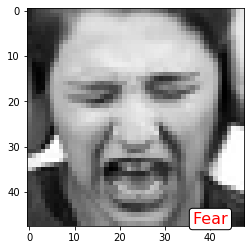

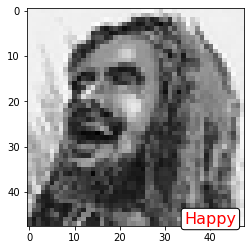

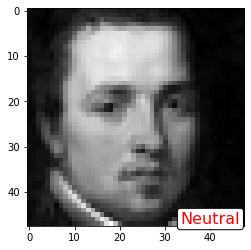

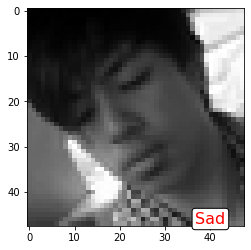

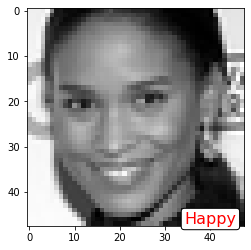

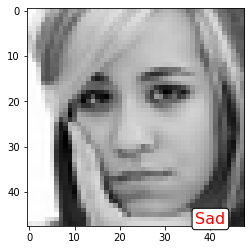

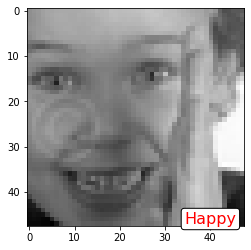

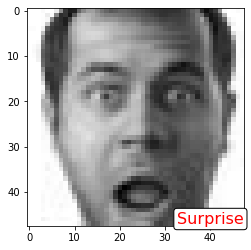

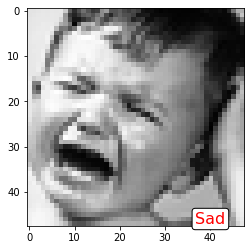

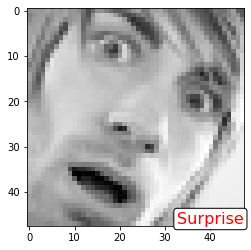

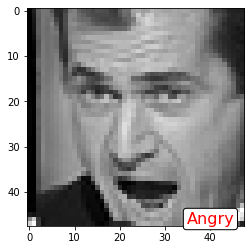

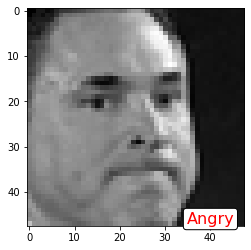

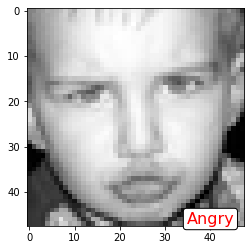

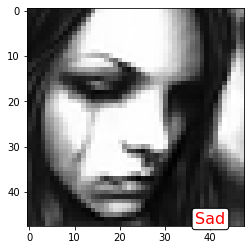

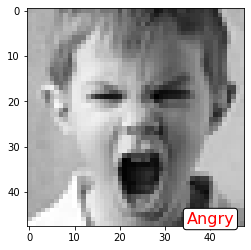

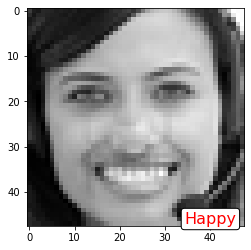

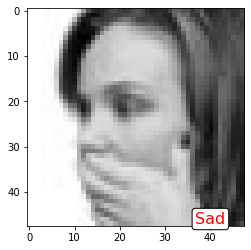

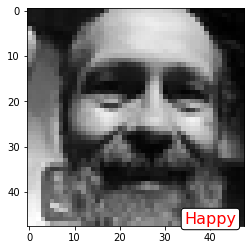

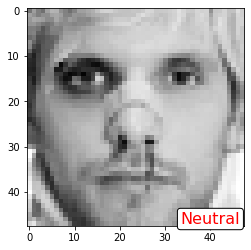

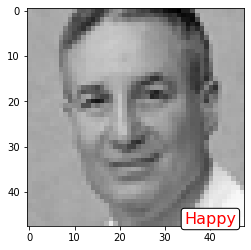

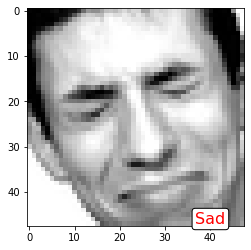

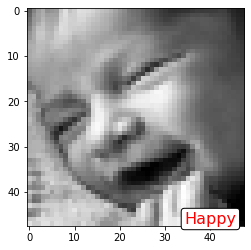

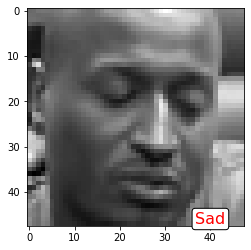

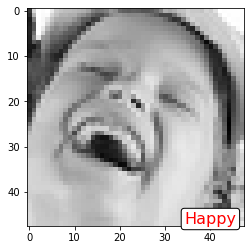

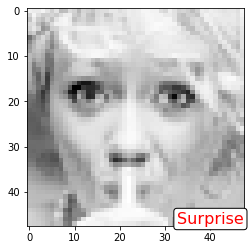

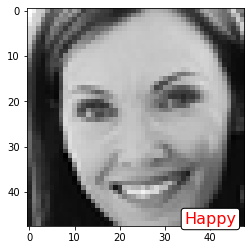

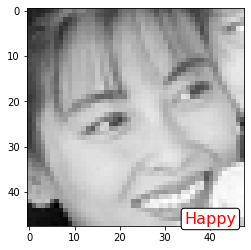

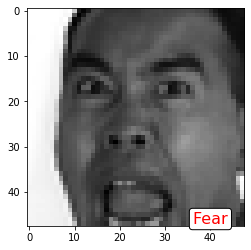

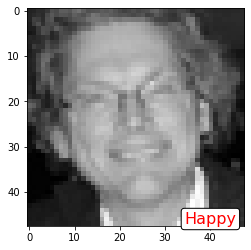

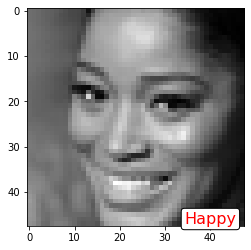

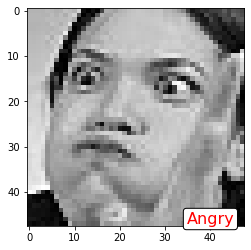

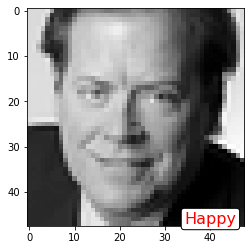

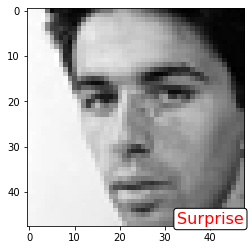

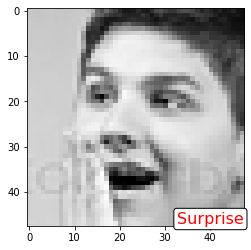

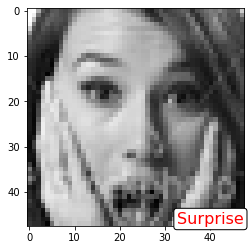

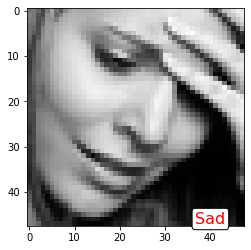

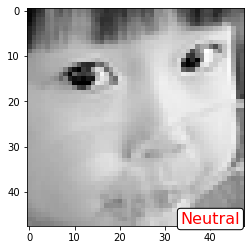

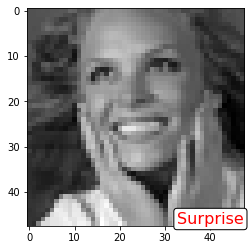

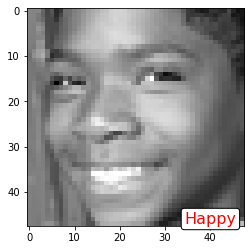

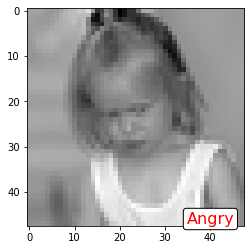

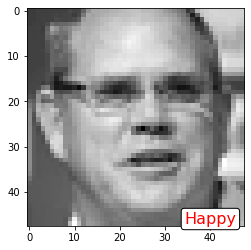

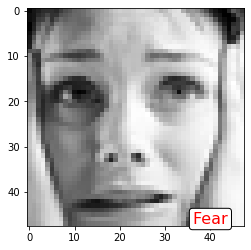

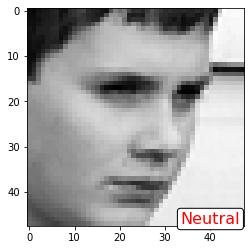

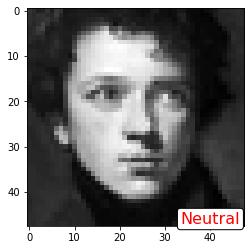

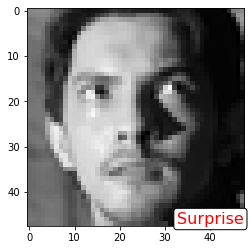

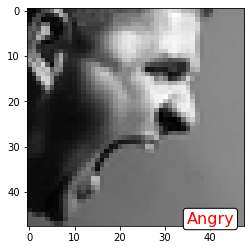

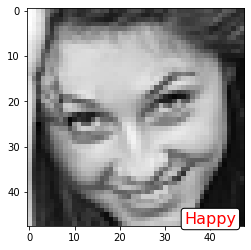

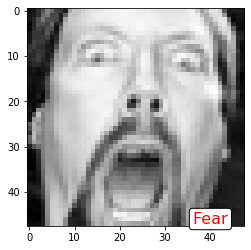

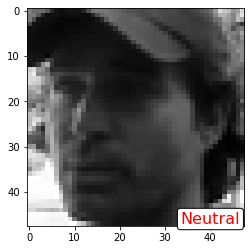

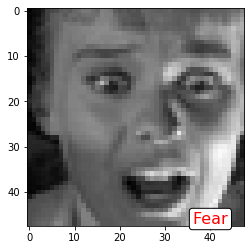

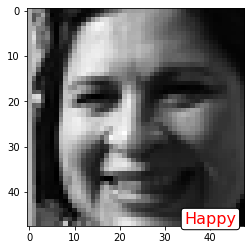

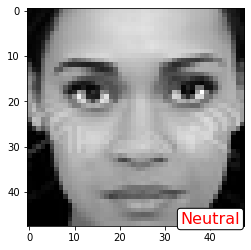

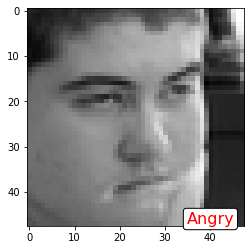

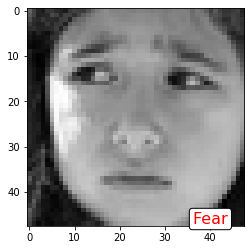

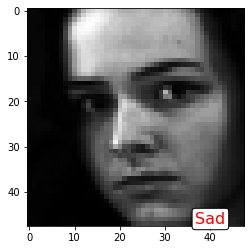

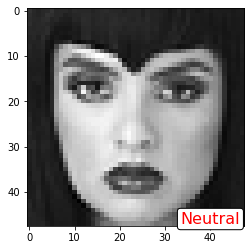

In [15]:
sample = np.random.choice(np.arange(df.shape[0]), size=100, replace=False)

for index in sample:
    img = np.fromstring(df.pixels[index], dtype=np.uint8, sep=' ').reshape(48, 48)
    plt.imshow(img, cmap=plt.gray())
    text_annotation(s=EMOTION_MAP[df.emotion[index]])
    plt.show()

In [16]:
emo_count = df.emotion.value_counts()
emotions_count = pd.Series(emo_count.values, index=list(map(lambda v: EMOTION_MAP[v], emo_count.index.values)))

In [17]:
emotions_count

Happy       8989
Neutral     6198
Sad         6077
Fear        5121
Angry       4953
Surprise    4002
Disgust      547
dtype: int64

### Statistics per Dataset (Training, Validation, Test)

In [18]:
df.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [19]:
df.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [20]:
df['data-set'] = df.Usage.apply(lambda v: 'training' if v == 'Training' else 'validation' if v == 'PrivateTest' else 'test')

In [21]:
data_sets = df['data-set'].unique()

In [22]:
data_sets

array(['training', 'test', 'validation'], dtype=object)

In [23]:
data_sets_count = {}
for name_set in data_sets:
    emo_count = df[df['data-set'] == name_set].emotion.value_counts()
    emotions_count = pd.Series(emo_count.values, index=list(map(lambda v: EMOTION_MAP[v], emo_count.index.values)))
    data_sets_count[name_set] = emotions_count

In [24]:
for name_set, emo_count in data_sets_count.items():
    print(f'{name_set}\n')
    print(emo_count)
    print('\n\n')

training

Happy       7215
Neutral     4965
Sad         4830
Fear        4097
Angry       3995
Surprise    3171
Disgust      436
dtype: int64



test

Happy       895
Sad         653
Neutral     607
Fear        496
Angry       467
Surprise    415
Disgust      56
dtype: int64



validation

Happy       879
Neutral     626
Sad         594
Fear        528
Angry       491
Surprise    416
Disgust      55
dtype: int64



